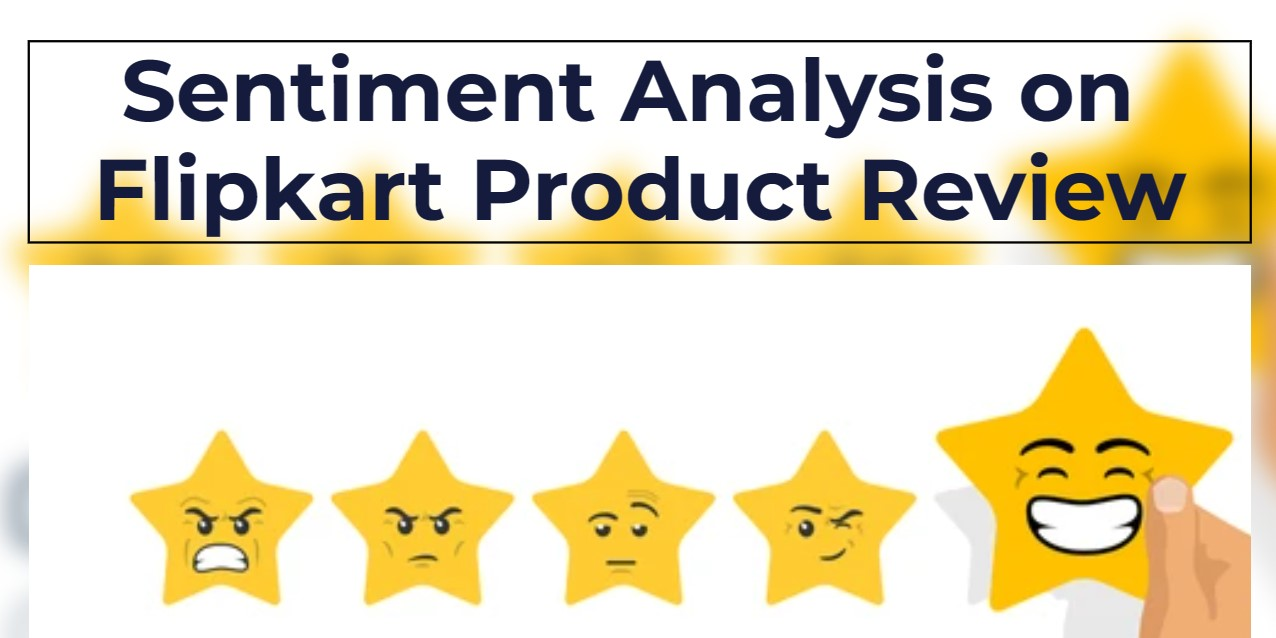

### Import Required Libraries

**We are going to use NLTK and Regular Expression (re) package**

In [111]:
#Reading Data
import pandas as pd
import numpy as np

#Ploting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

#Text Processing
import nltk
import re
from bs4 import BeautifulSoup
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Load & Read the data

In [91]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\NLP Dataset\\flipkart_product_reviews.csv')
df.head()

,Product_name,Review,Rating
0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,5
1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Good perfomence...,5
2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)","Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",5
3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",My wife is so happy and best product 👌🏻😘,5
4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Light weight laptop with new amazing features, battery life is awesome.",5


#### To see the full content in Reviews column change the width of column

In [92]:
pd.options.display.max_colwidth=10000
df.head()

,Product_name,Review,Rating
0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,5
1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Good perfomence...,5
2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)","Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",5
3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",My wife is so happy and best product 👌🏻😘,5
4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Light weight laptop with new amazing features, battery life is awesome.",5


In [93]:
df.shape

(2304, 3)

In [94]:
df.size

6912

In [95]:
df.columns

Index(['Product_name', 'Review', 'Rating'], dtype='object')

In [96]:
df.dtypes

Product_name    object
Review          object
Rating           int64
dtype: object

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  2304 non-null   object
 1   Review        2304 non-null   object
 2   Rating        2304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 54.1+ KB


### Descriptive Statistics

In [98]:
df.describe()

,Rating
count,2304.000000
mean,4.259549
std,1.180017
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Missing values

In [99]:
df.isna().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

**No missing values**

### Rating Scale

In [100]:
df.Rating.value_counts()

5    1382
4     552
1     184
3     140
2      46
Name: Rating, dtype: int64

In [101]:
rating=df.Rating.value_counts()
index=rating.index
value=rating.values

figure = px.pie(data_frame=df,
                values=value, 
                names=index, hole=0.4,
                title='Flipkart Product Ratings')
figure.show()

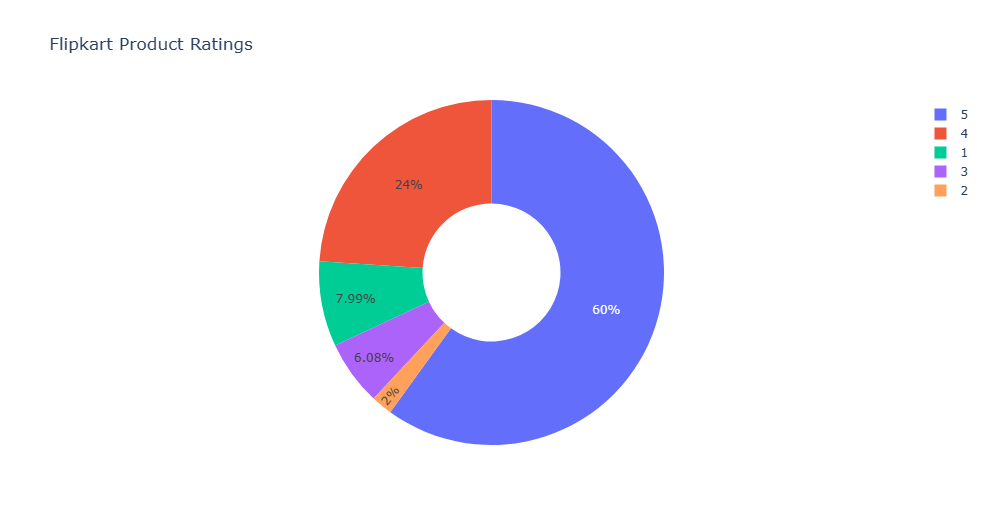

**Most of product got 5 star & 4 start rating. 60% Ratings are 5 Star, 24% are 4 Star.**

### Defining a Function which removes or replace some words

In [102]:
def decontract(text):
    text=re.sub(r"won\'t","will not", text)
    text=re.sub(r"can\'t","can not", text)
    text=re.sub(r"n\'t", "not", text)
    text=re.sub(r"\'re", "are", text)
    text=re.sub(r"\'s", "is", text)
    text=re.sub(r"\'d", "would", text)
    text=re.sub(r"\'ll", "will", text)
    text=re.sub(r"\'t", "not", text)
    text=re.sub(r"\'ve", "have", text)
    text=re.sub(r"\'m", "am", text)    
    return text

In [103]:
stopword=stopwords.words('english')

In [104]:
def clean(text):
    text = str(text).lower()
    text = decontract(text)                                            # decontracting
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)                   # removing website links
    text = BeautifulSoup(text, 'lxml').get_text()                      # removing html tags
    text = re.sub('<.*?>+', '', text)
    text = re.sub("\S*\d\S*", "", text).strip()                        # removing the words with numeric digits
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[^A-Za-z]+', ' ', text)                             # removing non-word characters
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["Review"] = df["Review"].apply(clean)

In [105]:
df.head()

,Product_name,Review,Rating
0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",best great performancei got around backup bit low thank rapid charger fast display ok price rang decent speaker mani customis optionsvantag softwar good customisationoveral good perform till nowwil updat later problem occur,5
1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",good perfom,5
2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",great perform usual also game laptopi issu batteri stand hrs without adapt prefer use adaptor use softwar play game,5
3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",wife happi best product,5
4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",light weight laptop new amaz featur batteri life awesom,5


### We can Perform Sentiment Analysis by 2 Ways.

# Approach-1

### Renaming Ratings to Categorical form

In [106]:
def sentiments(rating):
    if rating==5:
        return 'positive'
    elif rating<5 and rating>2:
        return 'neutral'
    else:
        return 'negative'
    
    
df['Sentiment_class']=df['Rating'].apply(sentiments)
df.head()

,Product_name,Review,Rating,Sentiment_class
0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",best great performancei got around backup bit low thank rapid charger fast display ok price rang decent speaker mani customis optionsvantag softwar good customisationoveral good perform till nowwil updat later problem occur,5,positive
1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",good perfom,5,positive
2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",great perform usual also game laptopi issu batteri stand hrs without adapt prefer use adaptor use softwar play game,5,positive
3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",wife happi best product,5,positive
4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",light weight laptop new amaz featur batteri life awesom,5,positive


In [71]:
df['Sentiment_class'].value_counts()

positive    1382
neutral      692
negative     230
Name: Sentiment_class, dtype: int64

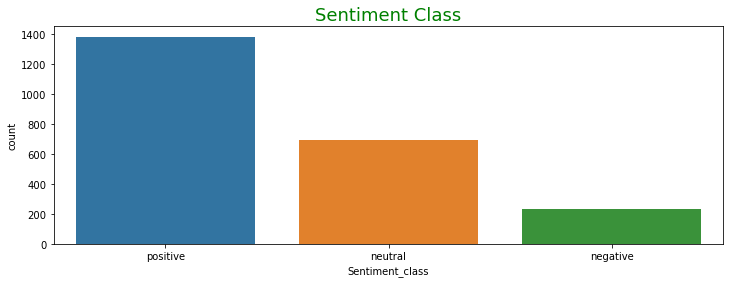

In [112]:
plt.figure(figsize=(12,4))
sns.countplot(df['Sentiment_class']);
plt.title('Sentiment Class', color='green', fontsize=18);

### Plot Positive Sentimet Words in Reviews

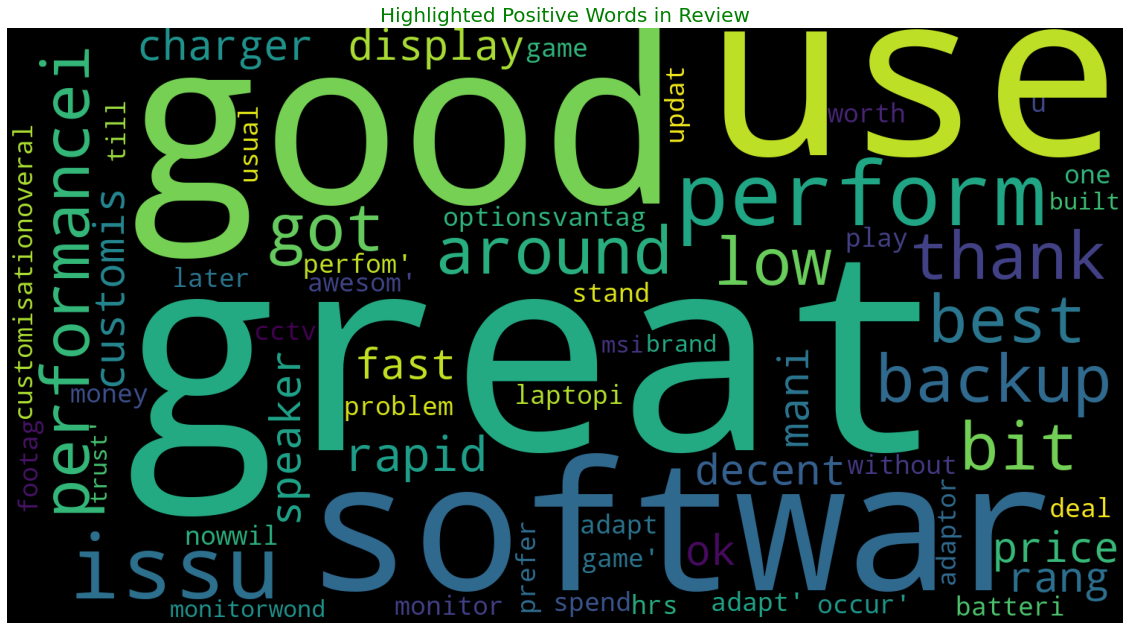

In [113]:
graph=df[df['Sentiment_class']=='positive']
review=graph['Review'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Positive Words in Review", color='green', fontsize=20)
plt.axis('off');

### Plot Negative Words in Review

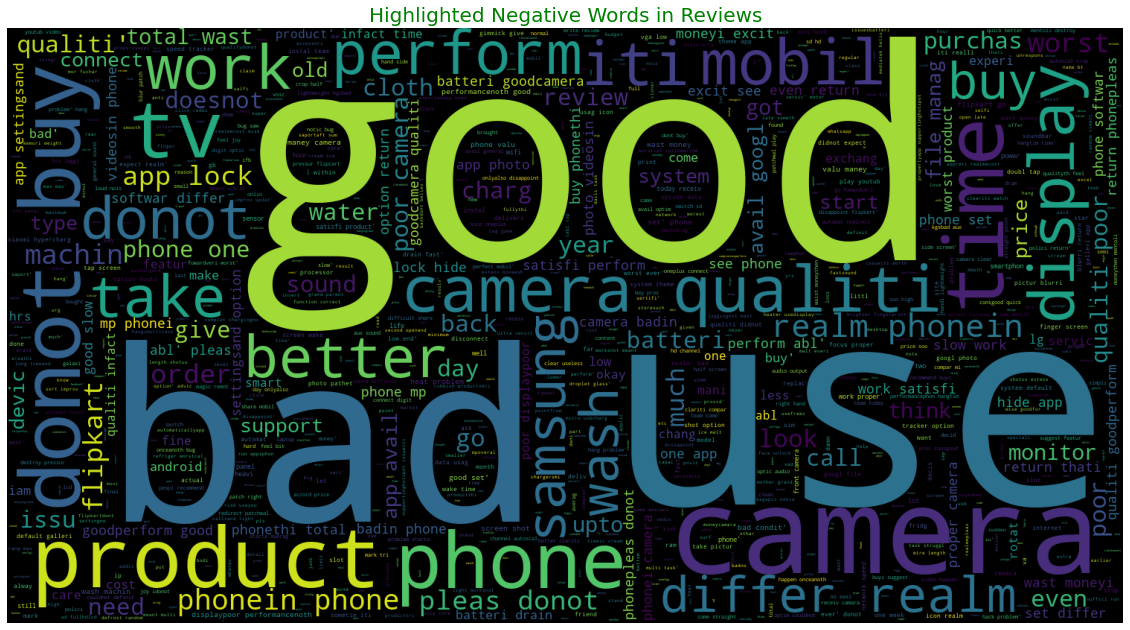

In [114]:
graph=df[df['Sentiment_class']=='negative']
review=graph['Review'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Negative Words in Reviews", color='green', fontsize=20)
plt.axis('off');

### Plot Neutral Words in Review

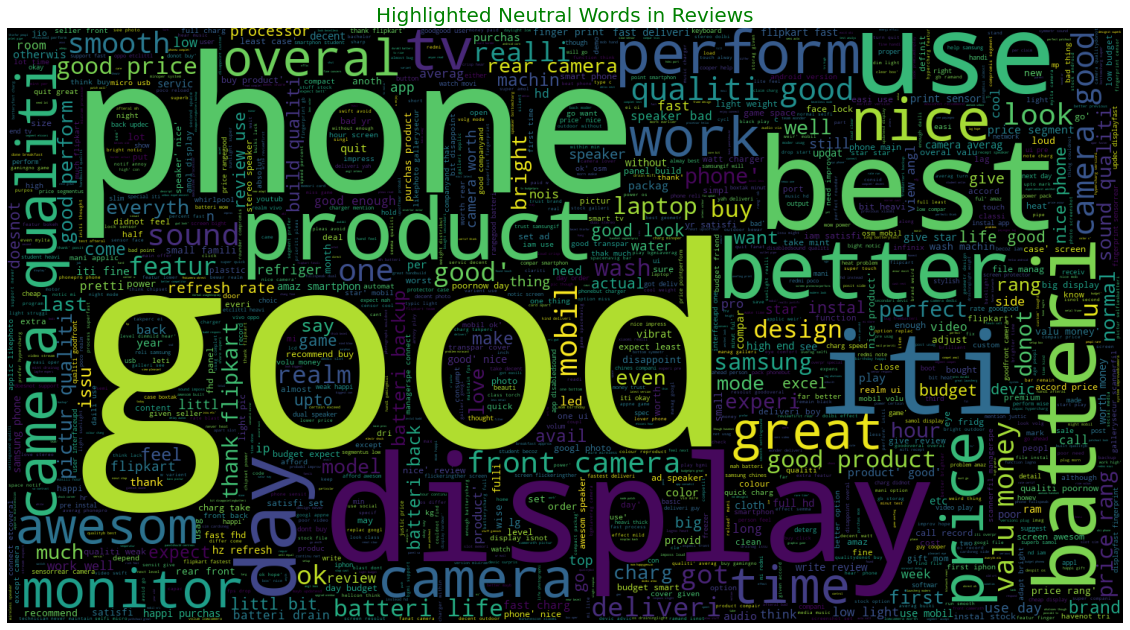

In [115]:
graph=df[df['Sentiment_class']=='neutral']
review=graph['Review'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Neutral Words in Reviews", color='green', fontsize=20)
plt.axis('off');

# Approach-2

### Plot the Highlighted Words in Reviews

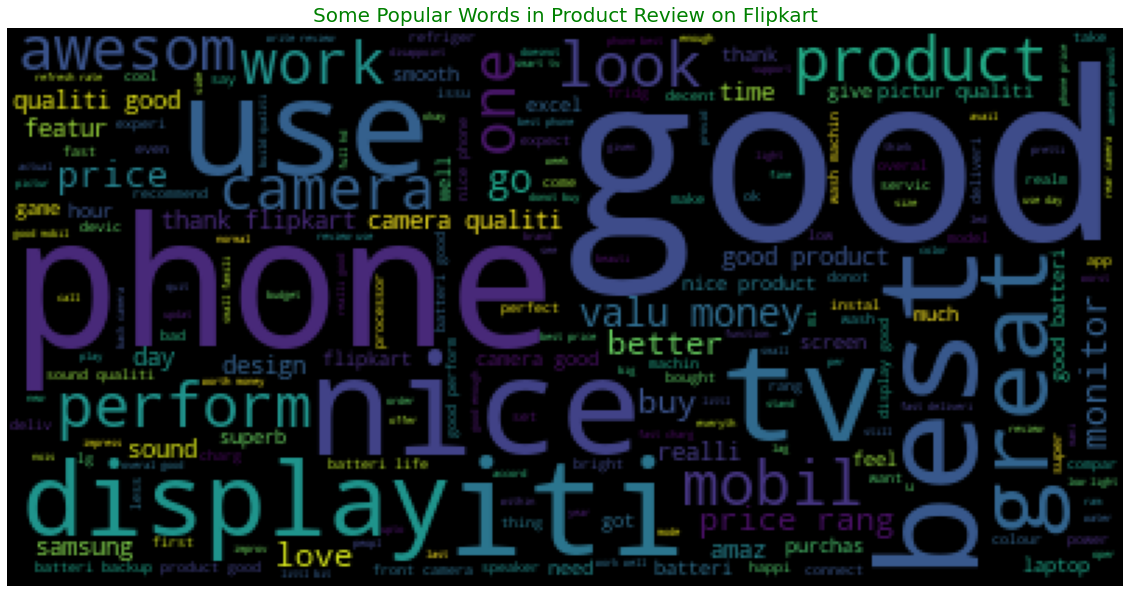

In [118]:
text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.title('Some Popular Words in Product Review on Flipkart', color='green',fontsize=20)
plt.axis("off")
plt.show()

### Create Sentiment Class by using Sentiment Intensity Analyzer

In [119]:
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]
df = df[["Review", "Positive", "Negative", "Neutral"]]
df.head()

,Review,Positive,Negative,Neutral
0,best great performancei got around backup bit low thank rapid charger fast display ok price rang decent speaker mani customis optionsvantag softwar good customisationoveral good perform till nowwil updat later problem occur,0.395,0.101,0.504
1,good perfom,0.744,0.000,0.256
2,great perform usual also game laptopi issu batteri stand hrs without adapt prefer use adaptor use softwar play game,0.277,0.000,0.723
3,wife happi best product,0.583,0.000,0.417
4,light weight laptop new amaz featur batteri life awesom,0.000,0.000,1.000


In [120]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [121]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  936.8839999999987
Negative:  96.17600000000027
Neutral:  1270.973000000001


### Plot the Sentiments

In [123]:
index=['Positive','Negative','Neutral']
value=[x,y,z]

figure = px.pie(data_frame=df,
                values=value, 
                names=index, hole=0.4,
                title='Flipkart Product Rating Sentimets')
figure.show()

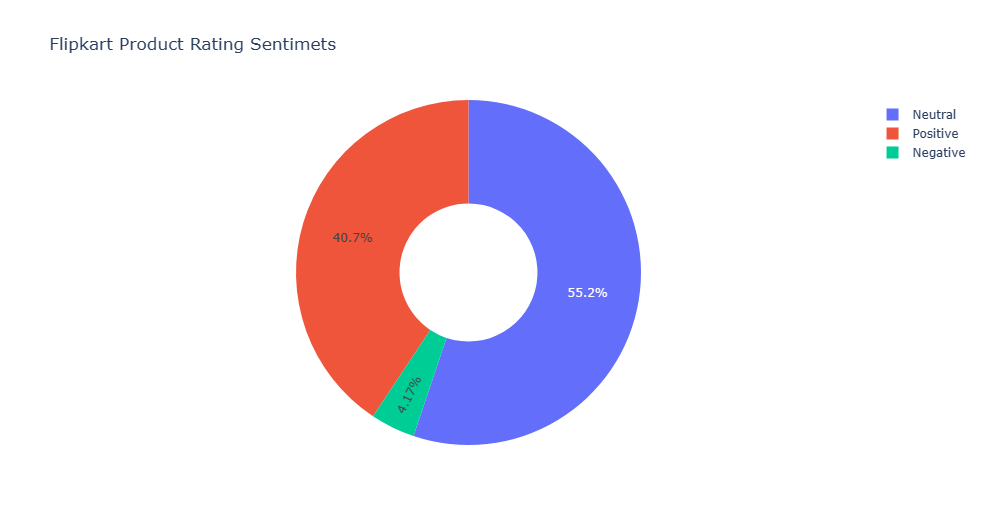

### Conclusion:
-1. **Most of the People are Giving Positive Reviews, Neutral Netral Reviews. Hence Most of the Buyers are Satisfied with the Flipkart Products.**

-2. **Nerly 4% Peopple are Giving Negative Reviews.**